In [148]:
%matplotlib inline
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from statistics import mean, median, stdev
from sklearn.metrics import mean_squared_error
import math

## data stored to b
b1 = bagreader('imu3.bag')
#shows a table of all topics with information of how many msgs in them
print(b1.topic_table)

[INFO]  Data folder imu3 already exists. Not creating.
  Topics               Types  Message Count  Frequency
0   /imu  imu_driver/imu_msg          11956  40.030006


In [149]:
# saving to csv
imu1= b1.message_by_topic(topic='/imu')
imu_1 = pd.read_csv(imu1)
imu_1

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,IMU.linear_acceleration.z,IMU.linear_acceleration_covariance,MagField.header.seq,MagField.header.stamp.secs,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance
0,1.666306e+09,10,1666305842,886416435,IMU1_Frame,10,1666305842,886425971,IMU1_Frame,-0.010380,...,-10.157,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",10,1666305842,886486291,IMU1_Frame,0.1240,-0.2362,0.4701,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
1,1.666306e+09,11,1666305842,911417007,IMU1_Frame,11,1666305842,911427497,IMU1_Frame,-0.010368,...,-10.149,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",11,1666305842,911487340,IMU1_Frame,0.1249,-0.2371,0.4742,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,1.666306e+09,12,1666305842,936494350,IMU1_Frame,12,1666305842,936503410,IMU1_Frame,-0.010360,...,-10.145,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",12,1666305842,936561107,IMU1_Frame,0.1230,-0.2400,0.4680,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,1.666306e+09,13,1666305842,961520671,IMU1_Frame,13,1666305842,961530447,IMU1_Frame,-0.010360,...,-10.133,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",13,1666305842,961588621,IMU1_Frame,0.1249,-0.2409,0.4722,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,1.666306e+09,14,1666305842,986245155,IMU1_Frame,14,1666305842,986254453,IMU1_Frame,-0.010353,...,-10.169,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",14,1666305842,986312627,IMU1_Frame,0.1203,-0.2399,0.4730,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11951,1.666306e+09,11961,1666306141,631884574,IMU1_Frame,11961,1666306141,631894826,IMU1_Frame,-0.010515,...,-10.183,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",11961,1666306141,631963729,IMU1_Frame,0.1249,-0.2353,0.4630,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
11952,1.666306e+09,11962,1666306141,656873226,IMU1_Frame,11962,1666306141,656883955,IMU1_Frame,-0.010515,...,-10.128,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",11962,1666306141,656952381,IMU1_Frame,0.1249,-0.2372,0.4681,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
11953,1.666306e+09,11963,1666306141,681788921,IMU1_Frame,11963,1666306141,681801557,IMU1_Frame,-0.010522,...,-10.176,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",11963,1666306141,681881189,IMU1_Frame,0.1230,-0.2419,0.4650,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
11954,1.666306e+09,11964,1666306141,706873178,IMU1_Frame,11964,1666306141,706882953,IMU1_Frame,-0.010511,...,-10.152,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",11964,1666306141,706957101,IMU1_Frame,0.1221,-0.2381,0.4629,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


### Quaternion to Euler Conversion

In [150]:
# Quaternion to Euler conversion
def euler_from_quaternion(quaternionVector):
	
    roll=[]
    pitch=[]
    yaw=[]

    for x, y, z, w in quaternionVector:
        A0 = +2.0 * (w * x + y * z)
        A1 = +1.0 - 2.0 * (x * x + y * y)
        roll.append(math.atan2(A0, A1)*(180/(np.pi)))

        A2 = +2.0 * (w * y - z * x)
        A2 = +1.0 if A2 > +1.0 else A2
        A2 = -1.0 if A2 < -1.0 else A2
        pitch.append(math.asin(A2)*(180/(np.pi)))

        A3 = +2.0 * (w * z + x * y)
        A4 = +1.0 - 2.0 * (y * y + z * z)
        yaw.append(math.atan2(A3, A4)*(180/(np.pi)))

    return yaw, pitch, roll

### (1) Orientation

In [151]:
Q = zip(imu_1["IMU.orientation.x"], imu_1["IMU.orientation.y"], imu_1["IMU.orientation.z"], imu_1["IMU.orientation.w"])

yawList, pitchList, rollList = euler_from_quaternion(Q)

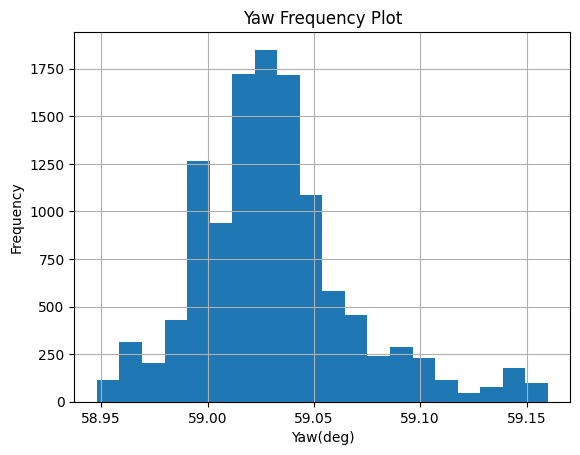

In [152]:
plt.hist(yawList, bins=20)
plt.xlabel("Yaw(deg)")
plt.ylabel("Frequency")
plt.title("Yaw Frequency Plot")
plt.grid()

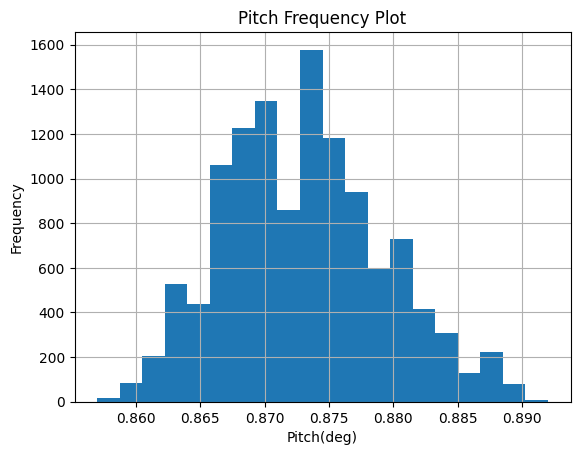

In [153]:
plt.hist(pitchList, bins=20)
plt.xlabel("Pitch(deg)")
plt.ylabel("Frequency")
plt.title("Pitch Frequency Plot")
plt.grid()

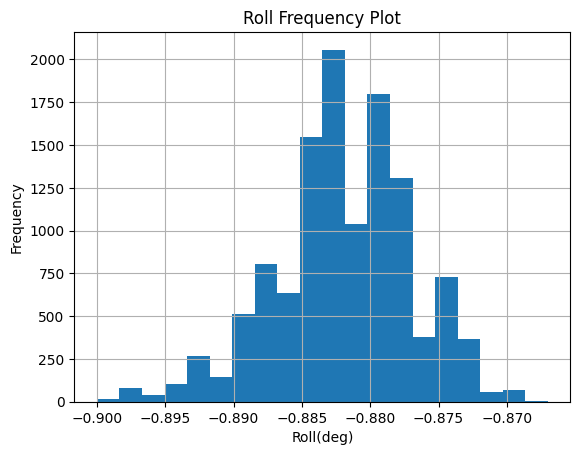

In [154]:
plt.hist(rollList, bins=20)
plt.xlabel("Roll(deg)")
plt.ylabel("Frequency")
plt.title("Roll Frequency Plot")
plt.grid()

Mean of Yaw = 59.03153596520575
Standard Deviation of Yaw = 0.03681363822590714


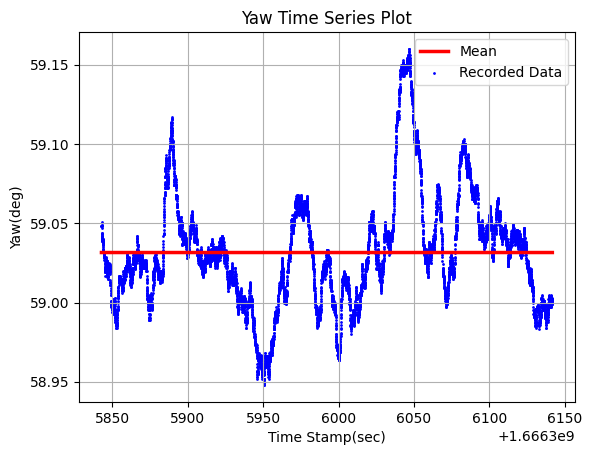

In [155]:
m1 = mean(yawList) 
print("Mean of Yaw =",m1)
print("Standard Deviation of Yaw =", stdev(yawList))
mn = yawList.copy()
l = len(yawList)
while(l):
    mn[l-1]=m1
    l-=1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], yawList, color='b', s=1, label='Recorded Data')
plt.ylabel("Yaw(deg)")
plt.xlabel("Time Stamp(sec)")
plt.title("Yaw Time Series Plot")
plt.legend()
plt.grid()

Mean of Pitch = 0.8731283874205342
Standard Deviation of Pitch = 0.006212209381885697


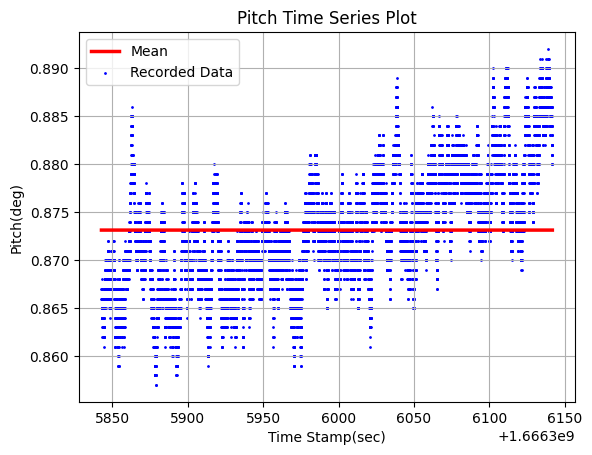

In [156]:
m1 = mean(pitchList) 
print("Mean of Pitch =",m1)
print("Standard Deviation of Pitch =", stdev(pitchList))
mn = rollList.copy()
l = len(pitchList)
while(l):
    mn[l-1]=m1
    l-=1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], pitchList, color='b', s=1, label='Recorded Data')
plt.ylabel("Pitch(deg)")
plt.xlabel("Time Stamp(sec)")
plt.title("Pitch Time Series Plot")
plt.legend()
plt.grid()

Mean of Roll = -0.8819105888256922
Standard Deviation of Roll = 0.005054693910353593


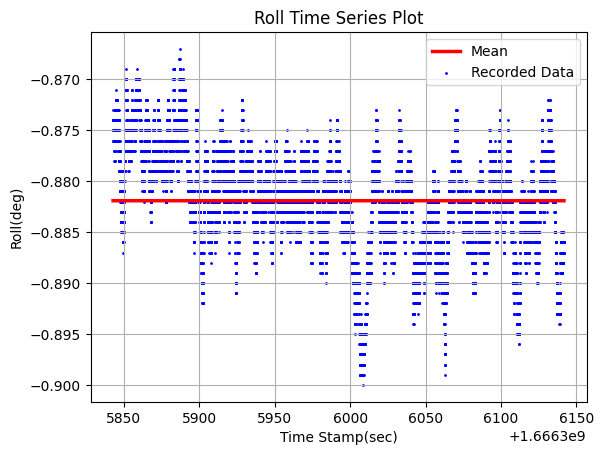

In [157]:
m1 = mean(rollList) 
print("Mean of Roll =",m1)
print("Standard Deviation of Roll =", stdev(rollList))
mn = rollList.copy()
l = len(rollList)
while(l):
    mn[l-1]=m1
    l-=1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], rollList, color='b', s=1, label='Recorded Data')
plt.ylabel("Roll(deg)")
plt.xlabel("Time Stamp(sec)")
plt.title("Roll Time Series Plot")
plt.legend()
plt.grid()

### (2) Accelerometer

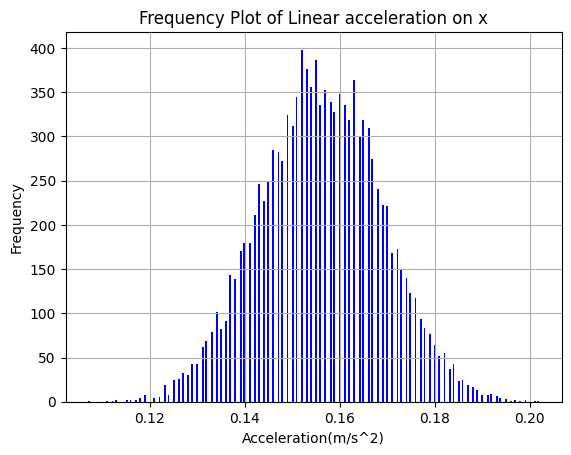

In [158]:
plt.hist(imu_1["IMU.linear_acceleration.x"],color='b', bins=250)
plt.xlabel("Acceleration(m/s^2)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Linear acceleration on x")
plt.grid()

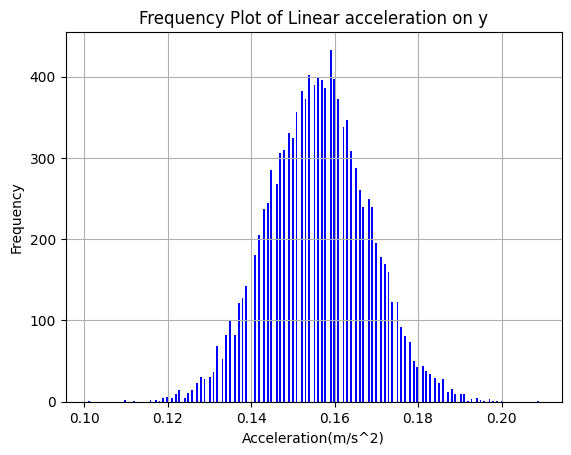

In [159]:

plt.hist(imu_1["IMU.linear_acceleration.y"],color='b', bins=250)
plt.xlabel("Acceleration(m/s^2)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Linear acceleration on y")
plt.grid()

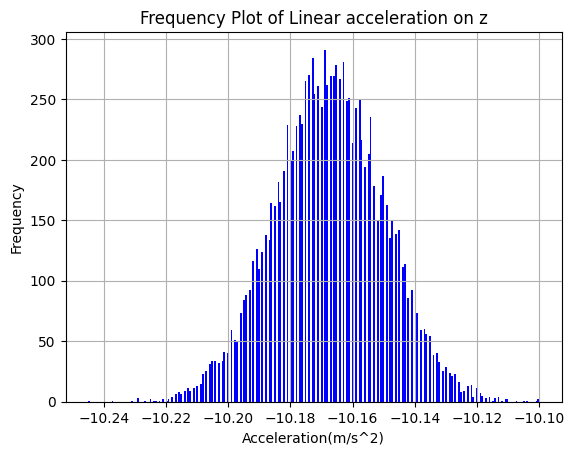

In [160]:
plt.hist(imu_1["IMU.linear_acceleration.z"],color='b', bins=250)
plt.xlabel("Acceleration(m/s^2)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Linear acceleration on z")
plt.grid()

Mean of linear acceleration in x = 0.15601823352291735
Standard Deviation of Linear Acceleration in x = 0.012810957071458101


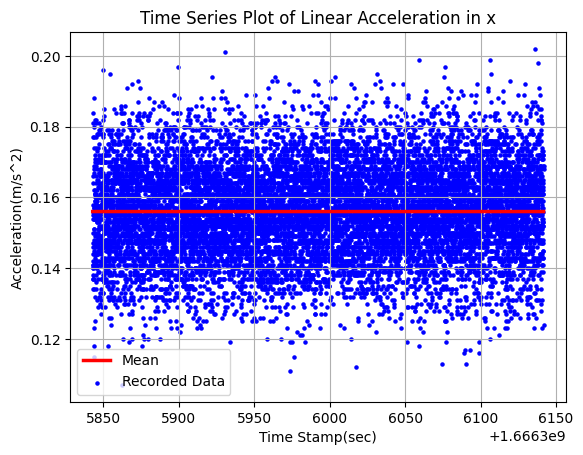

In [161]:
m1 = mean( imu_1['IMU.linear_acceleration.x']) 
print("Mean of linear acceleration in x =",m1)
print("Standard Deviation of Linear Acceleration in x =", stdev(imu_1['IMU.linear_acceleration.x']))
mn = imu_1['IMU.linear_acceleration.x'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.linear_acceleration.x"],color='b', s=5, label='Recorded Data')
plt.ylabel("Acceleration(m/s^2)")
plt.xlabel("Time Stamp(sec)")
plt.legend()
plt.title("Time Series Plot of Linear Acceleration in x")
plt.grid()

Mean of linear acceleration in y = 0.15602592840414856
Standard Deviation of Linear Acceleration in y = 0.012026876225851944


Text(0.5, 1.0, 'Time Series Plot of Linear Acceleration in y')

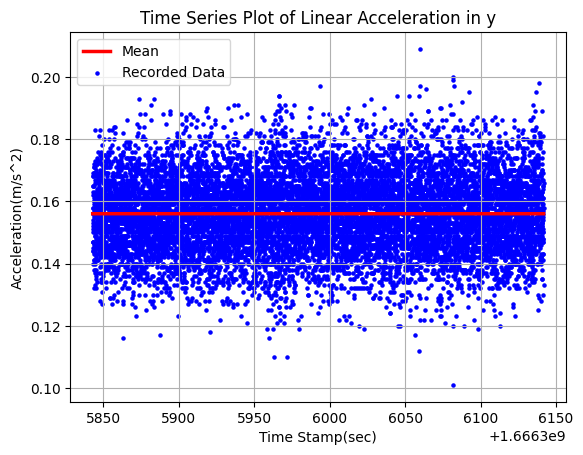

In [162]:
m1 = mean( imu_1['IMU.linear_acceleration.y']) 
print("Mean of linear acceleration in y =",m1)
print("Standard Deviation of Linear Acceleration in y =", stdev(imu_1['IMU.linear_acceleration.y']))
mn = imu_1['IMU.linear_acceleration.y'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"], mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.linear_acceleration.y"],color='b', s=5, label = 'Recorded Data')
plt.ylabel("Acceleration(m/s^2)")
plt.xlabel("Time Stamp(sec)")
plt.grid()
plt.legend()
plt.title("Time Series Plot of Linear Acceleration in y")

Mean of linear acceleration in z = -10.167420709267313
Standard Deviation of Linear Acceleration in z = 0.017576137373365424


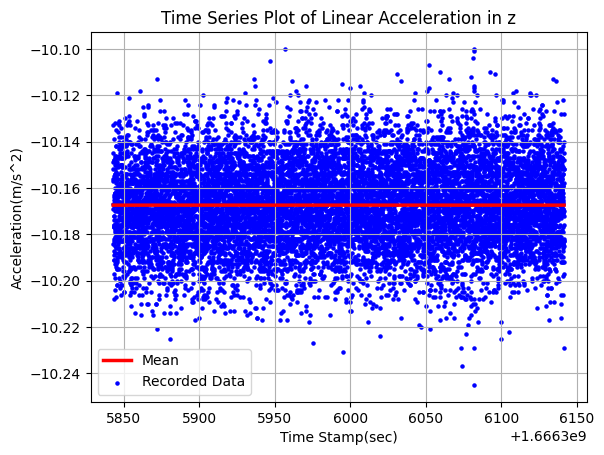

In [163]:
m1 = mean( imu_1['IMU.linear_acceleration.z']) 
print("Mean of linear acceleration in z =",m1)
print("Standard Deviation of Linear Acceleration in z =", stdev(imu_1['IMU.linear_acceleration.z']))
mn = imu_1['IMU.linear_acceleration.z'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.linear_acceleration.z"],color='b',s=5, label = 'Recorded Data')
plt.ylabel("Acceleration(m/s^2)")
plt.xlabel("Time Stamp(sec)")
plt.title("Time Series Plot of Linear Acceleration in z")
plt.legend()
plt.grid()

### (3) Gyroscope

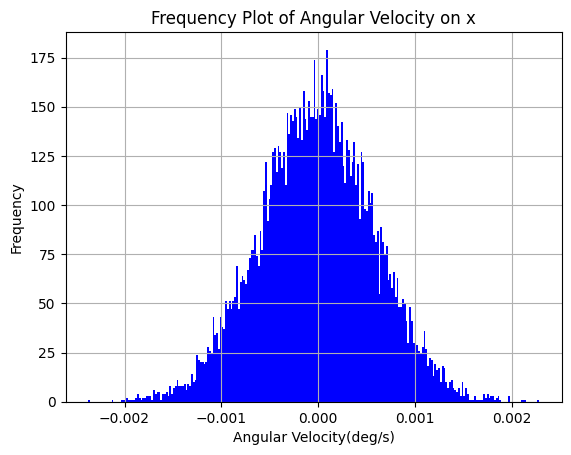

In [164]:
plt.hist(imu_1["IMU.angular_velocity.x"], color='b', bins=250)
plt.xlabel("Angular Velocity(deg/s)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Angular Velocity on x")

plt.grid()

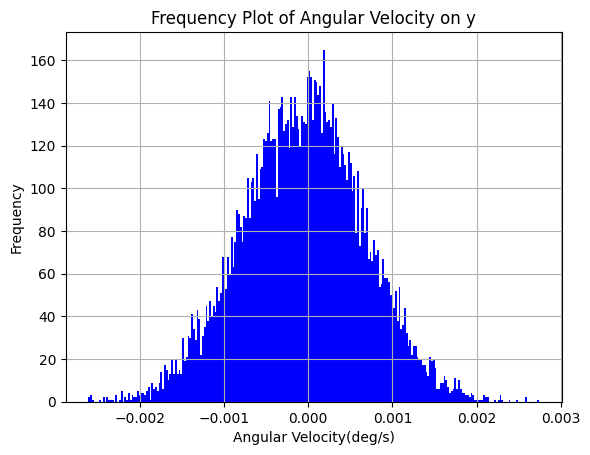

In [165]:
plt.hist(imu_1["IMU.angular_velocity.y"], color='b', bins=250)
plt.xlabel("Angular Velocity(deg/s)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Angular Velocity on y")
plt.grid()

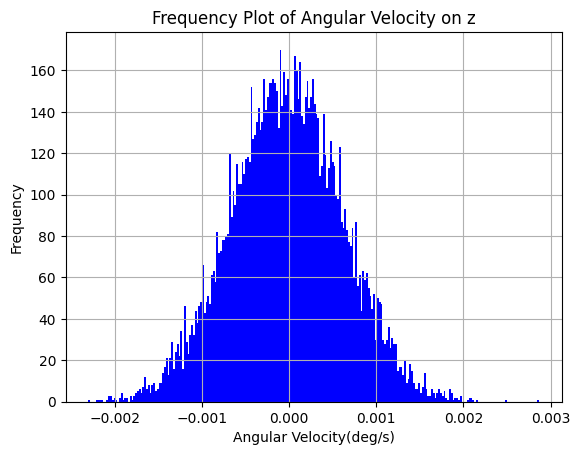

In [166]:
plt.hist(imu_1["IMU.angular_velocity.z"],color='b', bins=250)
plt.xlabel("Angular Velocity(deg/s)")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Angular Velocity on z")
plt.grid()

Mean of angular velocity in x = -1.602015724322516e-05
Standard Deviation of Angular Acceleration in x = 0.0005888859646764378


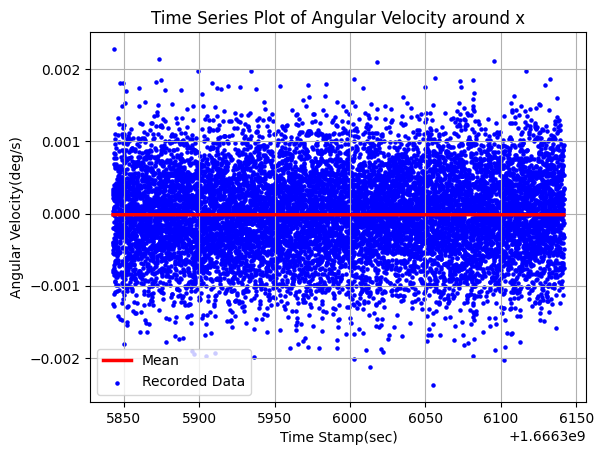

In [167]:
m1 = mean( imu_1['IMU.angular_velocity.x']) 
print("Mean of angular velocity in x =",m1)
print("Standard Deviation of Angular Acceleration in x =", stdev(imu_1['IMU.angular_velocity.x']))
mn = imu_1['IMU.angular_velocity.x'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.angular_velocity.x"],color='b',s=5, label = 'Recorded Data')
plt.ylabel("Angular Velocity(deg/s)")
plt.xlabel("Time Stamp(sec)")
plt.title("Time Series Plot of Angular Velocity around x")
plt.legend()
plt.grid()

Mean of angular velocity in y = -6.244814319170292e-05
Standard Deviation of Angular Acceleration in y = 0.0007217540457955409


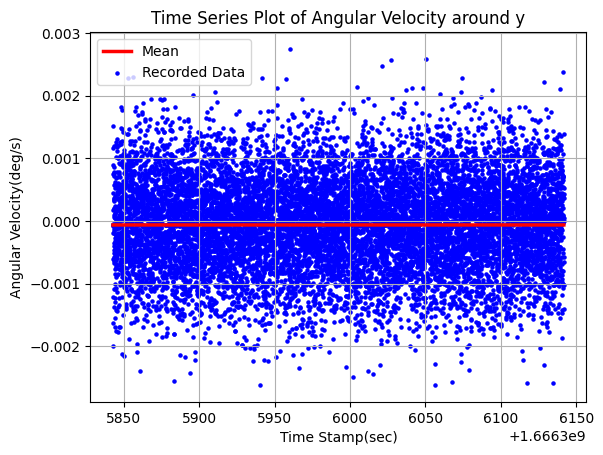

In [168]:
m1 = mean( imu_1['IMU.angular_velocity.y']) 
print("Mean of angular velocity in y =",m1)
print("Standard Deviation of Angular Acceleration in y =", stdev(imu_1['IMU.angular_velocity.y']))
mn = imu_1['IMU.angular_velocity.y'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.angular_velocity.y"],color='b',s=5, label = 'Recorded Data')
plt.ylabel("Angular Velocity(deg/s)")
plt.xlabel("Time Stamp(sec)")
plt.title("Time Series Plot of Angular Velocity around y")
plt.legend()
plt.grid()

Mean of angular velocity in z = -2.41468718634995e-05
Standard Deviation of Angular Acceleration in z = 0.0006381169675292166


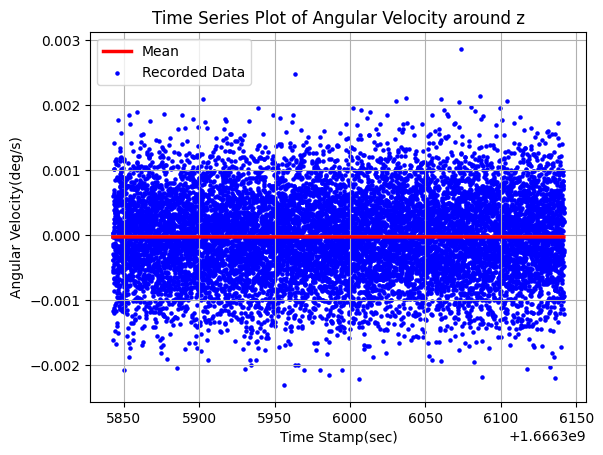

In [169]:
m1 = mean( imu_1['IMU.angular_velocity.z']) 
print("Mean of angular velocity in z =",m1)
print("Standard Deviation of Angular Acceleration in z =", stdev(imu_1['IMU.angular_velocity.z']))
mn = imu_1['IMU.angular_velocity.z'].copy()
mn1=mn.copy()
mn[:] = m1
plt.plot(imu_1["Time"],mn ,color='r',linewidth=2.5, label='Mean')

plt.scatter(imu_1["Time"], imu_1["IMU.angular_velocity.z"],color='b',s=5, label = 'Recorded Data')
plt.ylabel("Angular Velocity(deg/s)")
plt.xlabel("Time Stamp(sec)")
plt.title("Time Series Plot of Angular Velocity around z")
plt.legend()
plt.grid()